### Applied Data Science: Machine Learning
#### Introduction to data analysis with Python  
#### Project 1: World Happiness Report  

*Vincent Tomme*  
*Madrid - December 2020*  
*Data source: data.csv - World Happiness Report 2017 from Gallup World Poll*

#### A. Importing, cleaning and numerical summaries

In [1]:
# Import the panda library used in all sections
import pandas as pd

# Import the matplotlib (module pyplot) to draw the bar charts of sections C and D
import matplotlib.pyplot as plt
%matplotlib inline

# Import the seaborn library for the paired scatter plots of section E
import seaborn as sns

# Import the numpy library for the H section
import numpy as np

**1. Download the data set data.csv from the Resources tab and move the file to the current working directory**

**2. Import the data as a pandas DataFrame**

In [2]:
# read the csv data file located in the cwd and store it in a dataframe "df"
df = pd.read_csv('data.csv')

**3. Check the number of observations**

In [3]:
# Print the number of elements of the dataframe:
df.size

1836

**4. Obtain the column headings**

In [4]:
# Print the columns headings
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

**5. Check the data type for each column**

In [5]:
# Print the data types of each column
df.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

**6. Check if there are any missing values**

In [6]:
# Print a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           153 non-null    object 
 1   Happiness Rank    153 non-null    int64  
 2   Happiness Score   153 non-null    float64
 3   Economy           153 non-null    float64
 4   Family            153 non-null    float64
 5   Health            153 non-null    float64
 6   Freedom           153 non-null    float64
 7   Generosity        153 non-null    float64
 8   Corruption        153 non-null    float64
 9   Dystopia          153 non-null    float64
 10  Job Satisfaction  151 non-null    float64
 11  Region            153 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 14.5+ KB


We observe that the dataframe is made of 153 registers of 12 columns. 2 registers have an empty column (Job Satisfaction).

**7. Remove any observations to ensure that there are no missing values**

In [7]:
# Drop rows containing null values on the original dataframe
df.dropna(inplace=True)

In [8]:
# Detect zero values in the numerical columns
df[(df['Happiness Rank'] == 0) | (df['Happiness Score'] == 0.0) | (df['Economy'] == 0.0) | (df['Family'] == 0.0) | 
   (df['Health'] == 0.0) | (df['Freedom'] == 0.0) | (df['Generosity'] == 0.0) | (df['Corruption'] == 0.0) |
   (df['Dystopia'] == 0.0) | (df['Job Satisfaction'] == 0.0)]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
22,Lesotho,139,3.808,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835,44.4,Africa
26,Angola,140,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,71.1,Africa
57,Greece,87,5.227,1.289487,1.239415,0.810199,0.095731,0.000000,0.043290,1.749222,79.2,Eastern Europe
79,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
143,Bosnia and Herzegovina,90,5.182,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000,1.892173,73.7,Eastern Europe


We observe that 5 countries have zero values in at least one of the indicators. Nevertheless, at that point, we decide to keep these countries in the data frame.

**7.bis Ensure the values in each column are of the same data type**

After analysis of the summary above (6.) , we conclude that there is no need of change. The columns have already the right data types.

**8. Obtain the mean, minimum and maximum value for each column containing numerical data**

In [9]:
# Describe() method calculates general statistics for the numerical columns
df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


**9. List the 10 happiest countries, ordered by their happiness score**

In [10]:
# The method sort_values() sorts the rows giving a criteria and an order and the method head() returns the head subset of a dataframe
df.sort_values(by = ['Happiness Score'],ascending = False).head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
109,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
97,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
47,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
78,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
101,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
105,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
81,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
5,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
148,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific
21,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


**10. List the 10 least happy countries, ordered by their happiness score**

In [11]:
# The method tail() returns the tail subset of a dataframe
df.sort_values(by = ['Happiness Score'],ascending = False).tail(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
124,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America
138,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
139,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
107,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
53,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
133,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
39,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
45,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
40,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
79,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa


#### B. Indexing and grouping

**1. Group the data points by region and save them into separate .csv files ex. a Western Europe.csv with all the data for countries in Western Europe and so on for the other 5 regions**

In [12]:
# Setting the country as index
df.set_index('Country', inplace=True)

In [13]:
# Using the count() method to have an overview of the Region
df.groupby(['Region']).count()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Region,,,,,,,,,,
Africa,43,43,43,43,43,43,43,43,43,43
Asia-Pacific,43,43,43,43,43,43,43,43,43,43
Eastern Europe,21,21,21,21,21,21,21,21,21,21
Europe,1,1,1,1,1,1,1,1,1,1
Latin America,22,22,22,22,22,22,22,22,22,22
North America,2,2,2,2,2,2,2,2,2,2
Western Europe,19,19,19,19,19,19,19,19,19,19


In [14]:
# Displaying the unique country in the Europe Region
df[df['Region'] == 'Europe']

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Ukraine,132,4.096,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.3,Europe


At this stage we decide to move Ukraine to the Eastern Europe Region.
We keep the North America region although this region contains only 2 countries. Another option would be to merge Latin America and North America to have a region with a size more homegeneous with the other regions. 

In [15]:
# Moving Ukraine to the Eastern Europe Region and merging the Americas regions
df['Region'].replace('Europe', 'Eastern Europe', inplace = True)

In [16]:
# Writing a csv file for each 5 regions
df[(df['Region'] == 'Africa')].to_csv("Africa.csv", encoding='utf-8')
df[(df['Region'] == 'Western Europe')].to_csv("Western Europe.csv", encoding='utf-8')
df[(df['Region'] == 'Eastern Europe')].to_csv("Eastern Europe.csv", encoding='utf-8')
df[(df['Region'] == 'North America')].to_csv("North America.csv", encoding='utf-8')
df[(df['Region'] == 'Latin America')].to_csv("Latin America.csv", encoding='utf-8')
df[(df['Region'] == 'Asia-Pacific')].to_csv("Asia-Pacific.csv", encoding='utf-8')

**2. Compute the mean happiness score for each region and rank the regions from most happy to least happy**

In [17]:
# Combining the group_by(), the mean() and sort_values() methods to rank the regions from most happy to least happy
df.groupby(['Region'])['Happiness Score'].mean().sort_values(ascending = False)

Region
North America     7.154500
Western Europe    6.880474
Latin America     5.957818
Eastern Europe    5.435182
Asia-Pacific      5.358326
Africa            4.254581
Name: Happiness Score, dtype: float64

**3. Compute the number of countries in each region that have a happiness score above 6.0**

In [18]:
# Using the group_by() and count() methods to compute the number of countries that have a happiness score above 6.0 by region
df[df['Happiness Score'] > 6.0].groupby(['Region'])['Happiness Score'].count()

Region
Asia-Pacific      11
Eastern Europe     1
Latin America     13
North America      2
Western Europe    17
Name: Happiness Score, dtype: int64

**4. Compute the difference between the maximum and minimum happiness score for each region**  
Which region has the largest range of happiness scores?

In [19]:
# Calculate the happiness score range by region using the agg() method and rename the column result
df.groupby(['Region'])['Happiness Score'].agg(lambda x: max(x) - min(x)).to_frame().rename(columns={"Happiness Score": "Happiness Score Range"})

,Happiness Score Range
Region,
Africa,3.179
Asia-Pacific,3.852
Eastern Europe,2.002
Latin America,3.476
North America,0.323
Western Europe,2.342


Asia-Pacific is the region with the largest range of hapiness scores

#### C. Bar plot of the Happiness Score

**1. Horizontal bar chart of the Happiness Score**

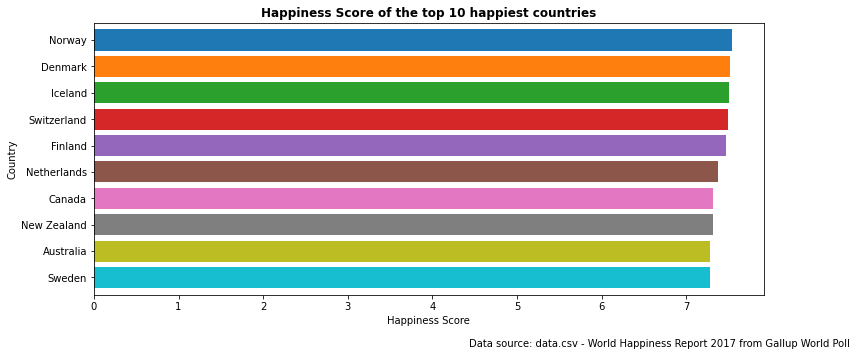

In [20]:
# Select the dataframe to plot (10 higher happiness scores)
values = df['Happiness Score'].sort_values(ascending = False).head(10)
# Set a color palette 
colormap = plt.cm.tab10(range(0, len(values)))
# Horizontal bar plot
bar_plot = values.plot.barh(color=colormap, width = 0.8, figsize =(12,5))
bar_plot.set_title('Happiness Score of the top 10 happiest countries', fontweight = 'bold')
bar_plot.set_xlabel('Happiness Score')
bar_plot.invert_yaxis()
plt.figtext(1,-0.02,'Data source: data.csv - World Happiness Report 2017 from Gallup World Poll', horizontalalignment='right')
plt.show()

**2. Stacked bar chart of the Happiness Score**

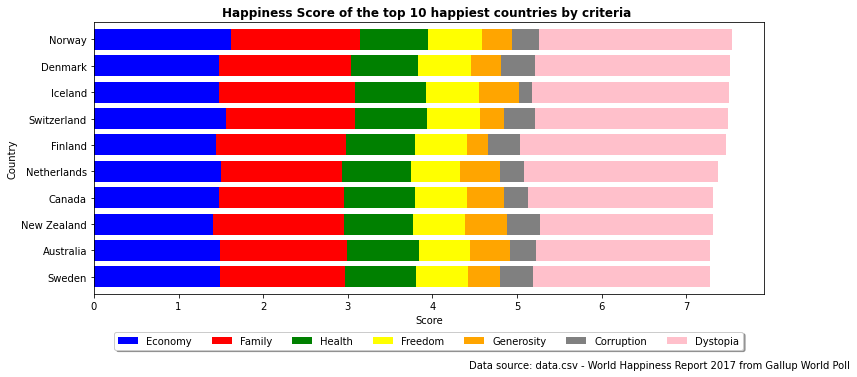

In [21]:
# Select the dataframe to plot (10 countries with the higher happiness scores)
values = df.sort_values(by = ['Happiness Score'],ascending = False).head(10)
# Horizontal stacked bar plot
bar_plot = values['Economy'].plot.barh(color='blue', width = 0.8, label='Economy', figsize =(12,5))
bar_plot = values['Family'].plot.barh(color='red', width = 0.8, left = values['Economy'], label='Family')
bar_plot = values['Health'].plot.barh(color='green', width = 0.8, left = values['Economy']+values['Family'], label='Health')
bar_plot = values['Freedom'].plot.barh(color='yellow', width = 0.8, left = values['Economy']+values['Family']+values['Health'], label='Freedom')
bar_plot = values['Generosity'].plot.barh(color='orange', width = 0.8, left = values['Economy']+values['Family']+values['Health']+values['Freedom'], label='Generosity')
bar_plot = values['Corruption'].plot.barh(color='grey', width = 0.8, left = values['Economy']+values['Family']+values['Health']+values['Freedom']+values['Generosity'], label='Corruption')
bar_plot = values['Dystopia'].plot.barh(color='pink', width = 0.8, left = values['Economy']+values['Family']+values['Health']+values['Freedom']+values['Generosity']+values['Corruption'], label='Dystopia')
bar_plot.set_title('Happiness Score of the top 10 happiest countries by criteria ', fontweight = 'bold')
bar_plot.set_xlabel('Score')
bar_plot.invert_yaxis()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), fancybox=True, shadow=True, ncol=7)
plt.figtext(1,-0.08,'Data source: data.csv - World Happiness Report 2017 from Gallup World Poll', horizontalalignment='right')
plt.show()

**3. Stacked bar chart of the Happiness Score for Africa**

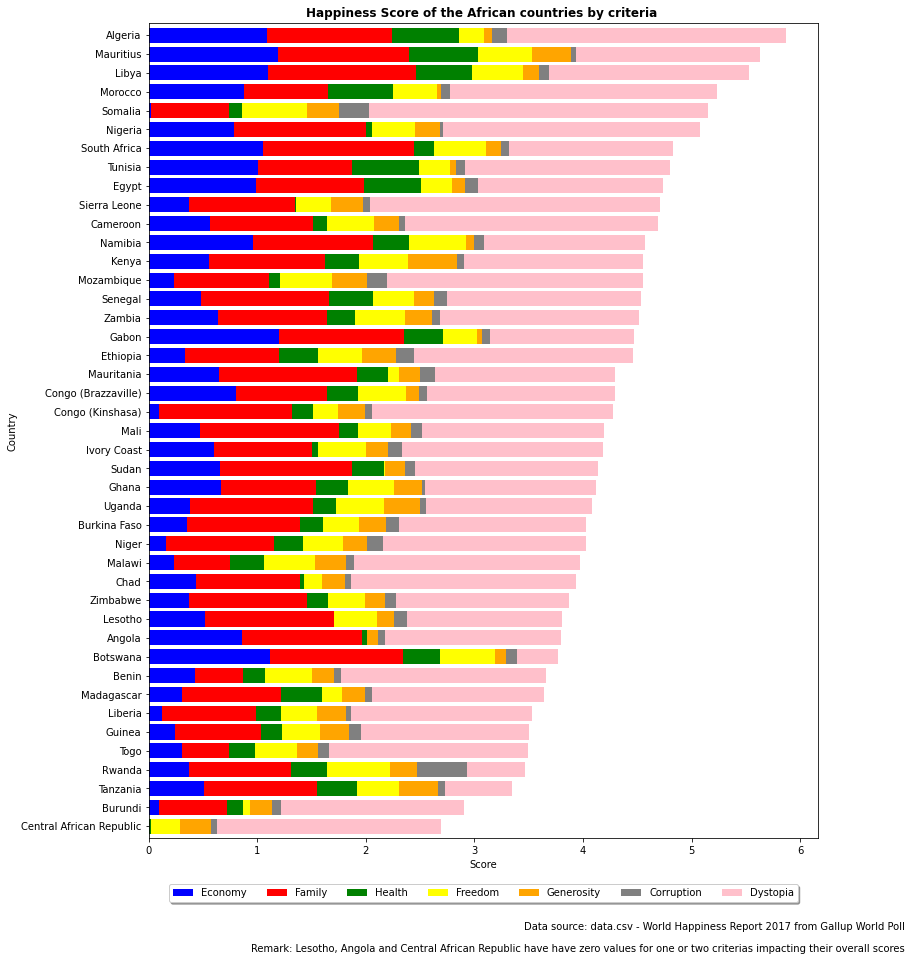

In [22]:
# Select the dataframe to plot (African countries ranked by their happiness score)
values = df[(df['Region'] == 'Africa')].sort_values(by = ['Happiness Score'],ascending = False)
# Horizontal stacked bar plot
bar_plot = values['Economy'].plot.barh(color='blue', width = 0.8, label='Economy', figsize =(12,15))
bar_plot = values['Family'].plot.barh(color='red', width = 0.8, left = values['Economy'], label='Family')
bar_plot = values['Health'].plot.barh(color='green', width = 0.8, left = values['Economy']+values['Family'], label='Health')
bar_plot = values['Freedom'].plot.barh(color='yellow', width = 0.8, left = values['Economy']+values['Family']+values['Health'], label='Freedom')
bar_plot = values['Generosity'].plot.barh(color='orange', width = 0.8, left = values['Economy']+values['Family']+values['Health']+values['Freedom'], label='Generosity')
bar_plot = values['Corruption'].plot.barh(color='grey', width = 0.8, left = values['Economy']+values['Family']+values['Health']+values['Freedom']+values['Generosity'], label='Corruption')
bar_plot = values['Dystopia'].plot.barh(color='pink', width = 0.8, left = values['Economy']+values['Family']+values['Health']+values['Freedom']+values['Generosity']+values['Corruption'], label='Dystopia')
bar_plot.set_title('Happiness Score of the African countries by criteria ', fontweight = 'bold')
bar_plot.set_xlabel('Score')
bar_plot.invert_yaxis()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=7)
plt.figtext(1,0.04,'Data source: data.csv - World Happiness Report 2017 from Gallup World Poll', horizontalalignment='right')
plt.figtext(1,0.02,'Remark: Lesotho, Angola and Central African Republic have have zero values for one or two criterias impacting their overall scores', horizontalalignment='right')
plt.show()

#### D. Histogram of Job Satisfaction

**1. Obtain a histogram of the Job Satisfaction using the following categories:  
40%-50%, 50%-60%, 60%-70%, 70%-80%, 80%-90%, 90%-100%**

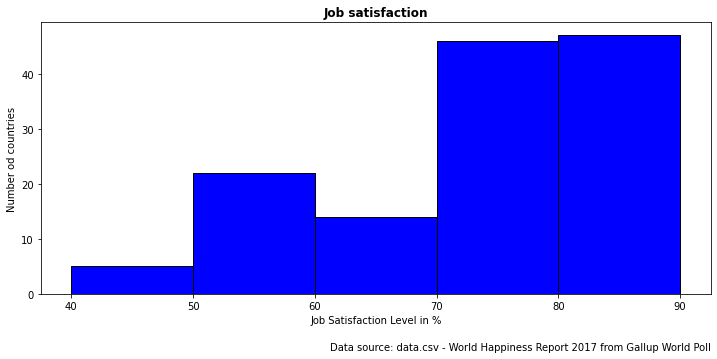

In [23]:
# Select the dataframe to plot (job satisfaction for all countries)
values = df['Job Satisfaction']
# Histogram plot
hist_plot = values.plot.hist(bins = range(40, 100, 10), color='blue', edgecolor='black', figsize =(12,5) )
hist_plot.set_xlabel('Job Satisfaction Level in %')
hist_plot.set_ylabel('Number od countries')
hist_plot.set_title('Job satisfaction', fontweight = 'bold')
plt.figtext(.9,-0.03,'Data source: data.csv - World Happiness Report 2017 from Gallup World Poll', horizontalalignment='right')
plt.show()

#### E. Pairwise scatter plots

**1. Obtain scatter plots of the Happiness Score versus each of the other variables**  

The plots should be displayed as multiple plots table and obtained with one command as opposed to separate commands for each plot.

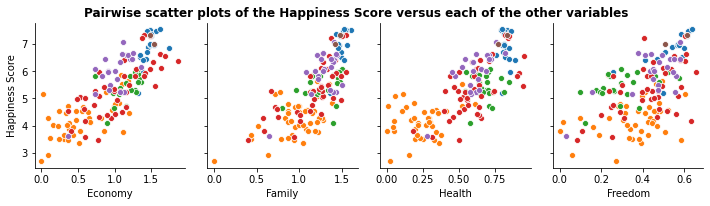

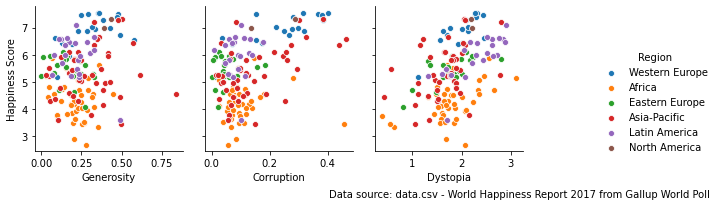

In [24]:
# Pairwise scatter plots of the Happiness Score versus each of the other variables (in 2 lines for readability)
pplt1 = sns.pairplot(df, y_vars = ['Happiness Score'], x_vars = ['Economy','Family','Health','Freedom'], hue = 'Region')
pplt1._legend.remove()
plt.title('Pairwise scatter plots of the Happiness Score versus each of the other variables', fontweight = 'bold',  horizontalalignment='right')
pplt2 = sns.pairplot(df, y_vars = ['Happiness Score'], x_vars = ['Generosity','Corruption','Dystopia'], hue = 'Region')
plt.figtext(1.1,-0.08,'Data source: data.csv - World Happiness Report 2017 from Gallup World Poll', horizontalalignment='right')
plt.show()

#### F. Correlation

**1. Obtain the correlation between the Happiness Score and each of the other variables**  

Which variable has the highest correlation with the Happiness Score?

In [25]:
# Computing the pairwise Pearson correlation of all columns except 'Happiness Rank' and 'Job Satisfaction'
df.drop(['Happiness Rank', 'Job Satisfaction'], axis = 1).corr(method = 'pearson')

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia
Happiness Score,1.000000,0.808678,0.749612,0.777731,0.567948,0.164123,0.438262,0.481117
Economy,0.808678,1.000000,0.685524,0.838884,0.363843,-0.015614,0.358750,0.022620
Family,0.749612,0.685524,1.000000,0.606674,0.412633,0.050771,0.236262,0.075480
Health,0.777731,0.838884,0.606674,1.000000,0.340986,0.068895,0.286777,0.055886
Freedom,0.567948,0.363843,0.412633,0.340986,1.000000,0.319387,0.501632,0.092923
Generosity,0.164123,-0.015614,0.050771,0.068895,0.319387,1.000000,0.292363,-0.102683
Corruption,0.438262,0.358750,0.236262,0.286777,0.501632,0.292363,1.000000,-0.014995
Dystopia,0.481117,0.022620,0.075480,0.055886,0.092923,-0.102683,-0.014995,1.000000


The 'Economy' is the indicator with the highest correlation with the 'Hapiness Score' (the coeficient is the closest to 1).

#### G. Probabilities

**1. Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe**

AF = Africa  
EE = Eastern Europe  
WE = Western Europe  
LA = Latin America  
NA = North America  
AP = Asia-Pacific  
$\Omega$ = {AF, EE, WE, LA, NA, AP}  

H+ = Countries with Hapiness score over 6.0
H- = Countries with Hapiness score below 6.0 or equal to 6.0  
$\Omega$ = {H+,H-}  

p = P(WE|H+)  
p = P(WE)∩P(H+)/(P(H+)  
p = Nb of countries from Western Europe with happiness score > 6 / Nb of countries with happiness score > 6

In [26]:
# Probability that randomly selected country with Happiness score over 6.0 is from Western Europe
p = df[(df['Region'] == 'Western Europe') & (df['Happiness Score']  > 6.0)]['Happiness Rank'].count() / df[df['Happiness Score']  > 6.0]['Happiness Rank'].count()
print(p.round(4)*100,'%')

38.64 %


#### H. Matrices

**1. Define a matrix whose rows correspond to countries and the columns to the regions**

In [27]:
# Define the countries/regions serie
df.reset_index(inplace = True)
df_country_region = df[['Country','Region']]

# Calculate the number of countries
nb_country = df_country_region['Country'].count()

# Calculate the list of regions
region = df_country_region['Region'].unique()

# Calculate the number of regions
nb_region = len(region)

# Create a new array (matrix) of shape nb_country*nb_region filled with zeros.
a = np.zeros((nb_country,nb_region), dtype = int)

# Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is 
# in the region in column j and a 0 otherwise
for i in range(nb_country):
    for j in range(nb_region):
        if df_country_region.iloc[i,1] == region[j]:
            a[i][j] = 1
a

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
 